In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [29]:
df2=pd.read_csv('./소비데이터_외식제외_202122.txt',delimiter='|', skiprows=[1], encoding='cp949')
df2.drop(df2.columns[[0,14]], axis=1, inplace=True)
df2.columns=['id','자택광역시도','가맹점광역시도','가맹점시군구','gb2','gb3','sex_ccd','cin_age_r',
            'ta_ym','daw_ccd_r','apv_ts_dl_tm_r','vlm','usec']

# 클러스터링 취미오락 포함

In [30]:
# '가맹점시군구'와 'gb3'로 그룹화하여 'vlm' 값의 평균 계산
grouped_df = df2.groupby(['가맹점시군구', 'gb2'])['vlm'].sum().reset_index()

# '가맹점시군구'를 행 인덱스로, 'gb3'를 열로 하는 피벗 테이블 생성
p1 = grouped_df.pivot_table(index='가맹점시군구', columns='gb2', values='vlm', fill_value=0)

In [31]:
p1

gb2,골프,공연관람,관광쇼핑,교육훈련,교통,독서,레저스포츠,목욕,미술공예참여,미용,...,운동경기관람,유흥,음악감상,인터넷게임,자전거,종교활동,종합쇼핑,체험,패션쇼핑,헬스
가맹점시군구,,,,,,,,,,,,,,,,,,,,,
26140,129065525,170088945,186770,806002379,36853333,387112116,311835091,183038128,166047469,3341375130,...,0,1246768610,1007155,611877712,610289,134971663,5141612228,18810317783,871847720,780471994
26170,37808651018,140929166,252529974,2200117698,3618594406,442991646,121992499,371478039,161194575,14348965472,...,0,6562353987,0,832089165,0,1129345723,25116570760,1893441,17702481070,781267509
26200,140486954,146803399,109097496,1855393048,867785993,1835570100,530903818,216027291,514636409,2633339616,...,0,1646047077,1323770,1082890486,168822929,36615561,9200074301,2136954307,1993311971,519605898
27170,714952891,217029095,44141363,1572636404,522044726,74017798,779071066,256225908,40055883,17803793491,...,0,2904926828,11965207,1002241064,418400241,589129799,57871882360,238201387,5097438965,699978096
27200,421549675,274028044,35335542,2279113030,354567562,837354737,907745768,518334668,656647363,10520150234,...,0,2417106351,145715971,1652429333,305183416,3631373166,20601128553,1065382911,4786283762,1929132068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48850,1302908443,34408281,626670492,230668703,80170672,17204425,938332337,299526786,456349596,599034672,...,0,975807013,6666655,346128567,5411998,313201170,23674678333,2446260975,1389572795,171068695
48860,383663236,20137568,2811261,202574696,0,2591004,511710695,100189804,97146743,611212774,...,0,553282864,0,25641626,0,494411052,20392830741,102411717,108283659,69051356
48870,4824192311,0,7434517,252090816,48625209,20065405,94278266,154522054,2927509,503702605,...,0,1279647373,0,42148756,3269113,78138627,15495754277,129544332,426881385,77715361


In [4]:
#scaler = StandardScaler()
scaler=MinMaxScaler()#사용
#scaler=RobustScaler() #극단적. 사용 x
df_scaled = scaler.fit_transform(p1)

In [5]:
pca = PCA()
pca.fit(df_scaled)
PC_score = pca.transform(df_scaled)
PC_score

array([[-0.06293856,  0.19040216, -0.02542748, ...,  0.02945928,
        -0.01707881, -0.02134517],
       [ 0.62909383,  0.35993184,  0.46174264, ..., -0.01105137,
         0.0072395 , -0.0070635 ],
       [ 0.10083215,  0.30796004, -0.18337342, ..., -0.01937912,
        -0.09597169,  0.02292171],
       ...,
       [-0.41511441,  0.06719158,  0.01779728, ..., -0.03706878,
        -0.02208953, -0.0347848 ],
       [-0.06987123,  0.17567525,  0.06954134, ..., -0.00644585,
        -0.00639053, -0.03110533],
       [-0.32559817, -0.10958629,  0.12299791, ...,  0.11147357,
        -0.035689  , -0.01447119]])

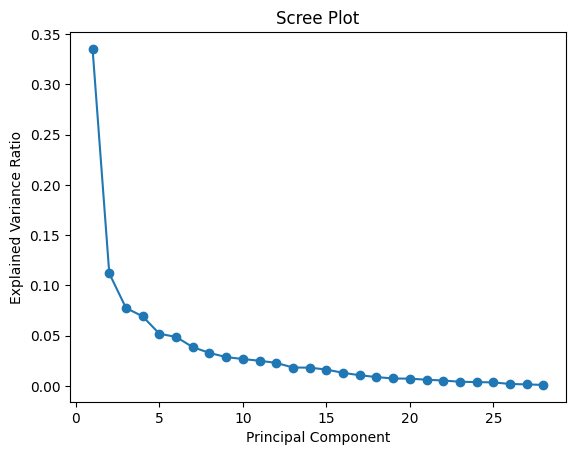

In [6]:
explained_var = pca.explained_variance_ratio_
plt.plot(np.arange(1, len(explained_var) + 1), explained_var, 'o-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show() #3 or 5

In [7]:
n_components = 5
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(df_scaled)

pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(n_components)])

In [8]:
# 군집 개수 결정
# Elbow method
inertia_arr=[]
k_range = range(2,15)
for k in k_range:
    Kmeans=KMeans(n_clusters=k,random_state=200)
    Kmeans.fit(pca_df)
    inertia = Kmeans.inertia_
    print('k: ',k,'inertia:',inertia)
    inertia_arr.append(inertia)
inertia_arr=np.array(inertia_arr)

k:  2 inertia: 24.705442574604795
k:  3 inertia: 20.32046667468965
k:  4 inertia: 17.566399224397472
k:  5 inertia: 15.331948558989621
k:  6 inertia: 12.838289019437966
k:  7 inertia: 11.32056055251344
k:  8 inertia: 9.249062402810846
k:  9 inertia: 8.456096632675719
k:  10 inertia: 7.418508375551789
k:  11 inertia: 6.49820996599795
k:  12 inertia: 5.347249148684485
k:  13 inertia: 5.089099393160145
k:  14 inertia: 4.571708620862117


In [9]:
# Silhouette score
from sklearn.metrics import silhouette_score
k_range=range(2,15)
best_n=-1
best_silhouette_score = -1
silhouette_score_arr = []
for k in k_range:
    kmeans=KMeans(n_clusters=k, random_state=200)
    kmeans.fit(pca_df)
    clusters=kmeans.predict(pca_df)
    score=silhouette_score(pca_df,clusters)
    print('k:',k,'score: ',score)
    silhouette_score_arr.append(score)

    if score> best_silhouette_score:
        best_n=k
        best_silhouette_score=score
        
print('best_n:',best_n,'best score:',best_silhouette_score)
silhouette_score_arr=np.array(silhouette_score_arr)

k: 2 score:  0.5581276746462616
k: 3 score:  0.5550415513725467
k: 4 score:  0.5388319984499556
k: 5 score:  0.33667791727838525
k: 6 score:  0.3719804613315389
k: 7 score:  0.3730919889628268
k: 8 score:  0.3520684802568636
k: 9 score:  0.3777697277599081
k: 10 score:  0.36601214980290114
k: 11 score:  0.38586077011531966
k: 12 score:  0.35399492567311547
k: 13 score:  0.3911952873619614
k: 14 score:  0.39403847802145375
best_n: 2 best score: 0.5581276746462616


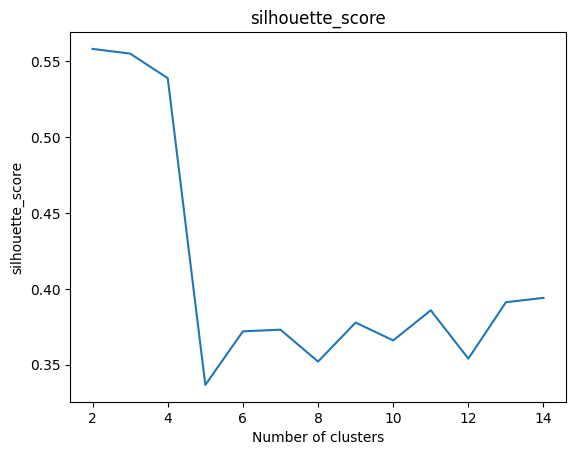

In [10]:
plt.plot(k_range,silhouette_score_arr)
plt.title('silhouette_score')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_score')
plt.show()


In [11]:
# K-means 클러스터링
num_clusters = 3 # 2,3,4 중 아래 시각화까지 적용하였을 경우 3이 가장 적합하다고 판단
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_df)

# 클러스터링 결과를 데이터프레임에 추가
pca_df['Cluster'] = kmeans_labels
pca_df

cluster1=pd.DataFrame(pca_df['Cluster'])
#cluster1

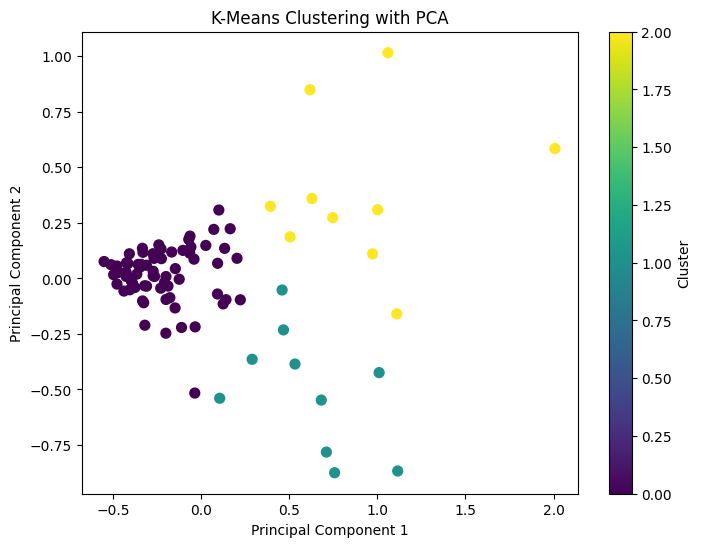

In [12]:
# Scatter plot을 그리기 위해 2차원으로 변환
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering with PCA')
plt.colorbar(label='Cluster')
plt.show()

In [13]:
df_group2 = pd.concat([p1.reset_index(drop=True), cluster1.reset_index(drop=True)], axis=1)

In [14]:
sum_by_cluster = df_group2.groupby('Cluster').sum()
cluster_with_highest_sum = sum_by_cluster.idxmax()

print(cluster_with_highest_sum)

골프         0
공연관람       0
관광쇼핑       0
교육훈련       0
교통         0
독서         0
레저스포츠      1
목욕         0
미술공예참여     0
미용         2
사진촬영       2
숙박         1
스키         0
스포츠용품구매    0
악기연주       2
애완동물돌보기    2
여행사        0
외식         0
운동경기관람     0
유흥         0
음악감상       0
인터넷게임      0
자전거        0
종교활동       0
종합쇼핑       0
체험         0
패션쇼핑       2
헬스         0
dtype: int64


# 클러스터링 취미오락 제외

In [32]:
#취미오락 제거
non_hobby_values = df2[df2['gb3'] != '취미오락  ']

# 가맹점시군구로 그룹화하여 usec의 합 구하기
grouped_df = non_hobby_values.groupby(['가맹점시군구', 'gb2'])['vlm'].sum().reset_index()

# 데이터프레임으로 변환 (피벗 테이블 대신)
df_group = grouped_df.pivot(index='가맹점시군구', columns='gb2', values='vlm').fillna(0)
df_group = df_group.astype(int)

p1 = grouped_df.pivot_table(index='가맹점시군구', columns='gb2', values='vlm', fill_value=0)

In [33]:
p1

gb2,골프,공연관람,관광쇼핑,교통,레저스포츠,미술공예참여,사진촬영,숙박,스키,스포츠용품구매,악기연주,여행사,운동경기관람,음악감상,자전거,체험,헬스
가맹점시군구,,,,,,,,,,,,,,,,,
26140,129065525,170088945,186770,36853333,311835091,166047469,102282486,15423823863,0,574843103,0,125758809,0,1007155,610289,18810317783,780471994
26170,37808651018,140929166,252529974,3618594406,121992499,161194575,115194844,16558560307,0,912174070,0,3356489362,0,0,0,1893441,781267509
26200,140486954,146803399,109097496,867785993,530903818,514636409,223428957,12183048374,0,640959433,0,15840801,0,1323770,168822929,2136954307,519605898
27170,714952891,217029095,44141363,522044726,779071066,40055883,280292902,4366961612,502981,7431248615,15227846,0,0,11965207,418400241,238201387,699978096
27200,421549675,274028044,35335542,354567562,907745768,656647363,1281789629,3933382205,0,1626150057,1306035477,0,0,145715971,305183416,1065382911,1929132068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48850,1302908443,34408281,626670492,80170672,938332337,456349596,7716049,7784829817,0,1051095488,0,1804836,0,6666655,5411998,2446260975,171068695
48860,383663236,20137568,2811261,0,511710695,97146743,14769006,2146857736,0,7314780,0,0,0,0,0,102411717,69051356
48870,4824192311,0,7434517,48625209,94278266,2927509,22502780,2539300322,0,765116079,136011815,0,0,0,3269113,129544332,77715361


In [16]:
#scaler = StandardScaler()
scaler=MinMaxScaler()#사용
#scaler=RobustScaler() #극단적. 사용 x
df_scaled = scaler.fit_transform(p1)

In [17]:
pca = PCA()
pca.fit(df_scaled)
PC_score = pca.transform(df_scaled)
PC_score

array([[ 0.02429533,  0.11105613, -0.01128614, ..., -0.13977876,
         0.03128901, -0.01642421],
       [ 0.08866957, -0.07891487,  0.37473964, ..., -0.03142875,
        -0.0368342 , -0.10772703],
       [ 0.07051502,  0.20635107, -0.16131221, ..., -0.11898257,
         0.04755964, -0.05494583],
       ...,
       [-0.29078582,  0.0793611 ,  0.00439322, ...,  0.04941796,
        -0.05491363,  0.02467991],
       [-0.04280189,  0.17710487, -0.00584994, ..., -0.00811943,
        -0.02378228,  0.01274006],
       [-0.22860294,  0.02934229,  0.08252079, ...,  0.05962765,
         0.0595813 ,  0.09834089]])

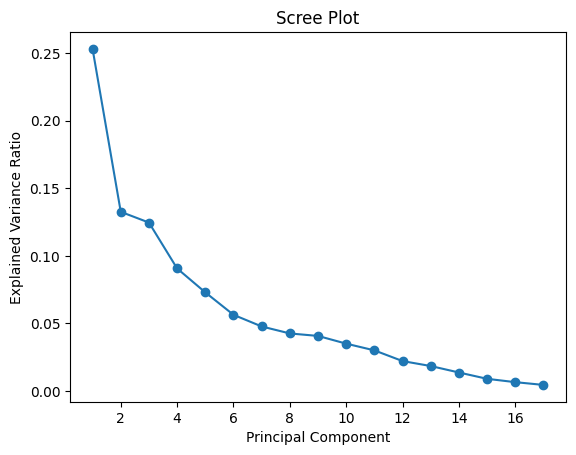

In [18]:
explained_var = pca.explained_variance_ratio_
plt.plot(np.arange(1, len(explained_var) + 1), explained_var, 'o-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show() #3 or 5

In [19]:
n_components = 4
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(df_scaled)

pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(n_components)])


#cluster1

In [20]:
# 군집 개수 결정
# Elbow method
inertia_arr=[]
k_range = range(2,15)
for k in k_range:
    Kmeans=KMeans(n_clusters=k,random_state=200)
    Kmeans.fit(pca_df)
    inertia = Kmeans.inertia_
    print('k: ',k,'inertia:',inertia)
    inertia_arr.append(inertia)
inertia_arr=np.array(inertia_arr)

k:  2 inertia: 14.827321454576722
k:  3 inertia: 11.394617824644818
k:  4 inertia: 8.46964643644409
k:  5 inertia: 6.321957617110851
k:  6 inertia: 4.746030721853314
k:  7 inertia: 4.192332184492164
k:  8 inertia: 3.7025423199897016
k:  9 inertia: 3.4087849854491994
k:  10 inertia: 2.827199523367308
k:  11 inertia: 2.509594538309646
k:  12 inertia: 2.1733590288156766
k:  13 inertia: 1.9705807221796774
k:  14 inertia: 1.7497909395091336


In [21]:
# Silhouette score
from sklearn.metrics import silhouette_score
k_range=range(2,15)
best_n=-1
best_silhouette_score = -1
silhouette_score_arr = []
for k in k_range:
    kmeans=KMeans(n_clusters=k, random_state=200)
    kmeans.fit(pca_df)
    clusters=kmeans.predict(pca_df)
    score=silhouette_score(pca_df,clusters)
    print('k:',k,'score: ',score)
    silhouette_score_arr.append(score)

    if score> best_silhouette_score:
        best_n=k
        best_silhouette_score=score
        
print('best_n:',best_n,'best score:',best_silhouette_score)
silhouette_score_arr=np.array(silhouette_score_arr)

k: 2 score:  0.48373250068270107
k: 3 score:  0.5176503482271938
k: 4 score:  0.547521913055284
k: 5 score:  0.5654155433418332
k: 6 score:  0.5069690177512318
k: 7 score:  0.5040737623848208
k: 8 score:  0.5012405126301128
k: 9 score:  0.375730409538918
k: 10 score:  0.38192103679148864
k: 11 score:  0.39091351048996137
k: 12 score:  0.3903334255678627
k: 13 score:  0.3372472537863057
k: 14 score:  0.28675622124976463
best_n: 5 best score: 0.5654155433418332


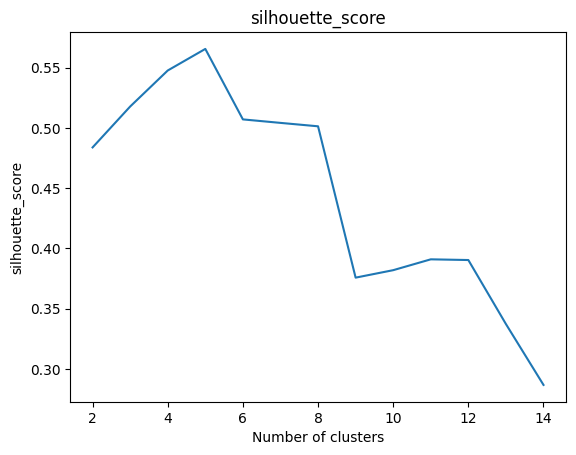

In [22]:
plt.plot(k_range,silhouette_score_arr)
plt.title('silhouette_score')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_score')
plt.show()


In [23]:
# K-means 클러스터링
num_clusters = 3 #3, 4, 5 중 아래시각화까지 적용하였을 경우 3이 가장 적합하다고 판단
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_df)

# 클러스터링 결과를 데이터프레임에 추가
pca_df['Cluster'] = kmeans_labels
pca_df

cluster1=pd.DataFrame(pca_df['Cluster'])

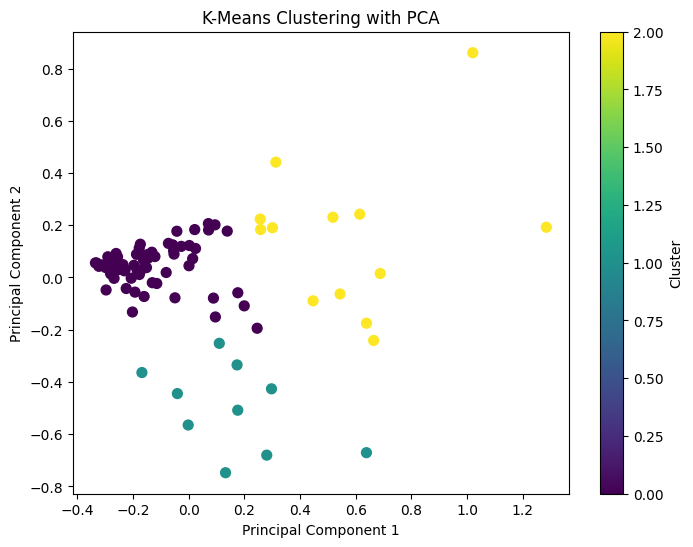

In [24]:
# Scatter plot을 그리기 위해 2차원으로 변환
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering with PCA')
plt.colorbar(label='Cluster')
plt.show()

In [25]:
df_group2 = pd.concat([p1.reset_index(drop=True), cluster1.reset_index(drop=True)], axis=1)

In [26]:
sum_by_cluster = df_group2.groupby('Cluster').sum()
cluster_with_highest_sum = sum_by_cluster.idxmax()

print(cluster_with_highest_sum)

골프         0
공연관람       1
관광쇼핑       0
교통         2
레저스포츠      2
미술공예참여     0
사진촬영       2
숙박         2
스키         0
스포츠용품구매    2
악기연주       2
여행사        0
운동경기관람     0
음악감상       0
자전거        0
체험         2
헬스         0
dtype: int64
